<a href="https://colab.research.google.com/github/sjquill/MSc_diss/blob/main/BREAST_Data/BreastDescriptive_Cox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-survival
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 5.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=f1163bb5f682fbec4da4184843b2c82e1d16777ebcfc4df366f58e84693b2599
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
pip install lifelines --upgrade


In [ ]:
import pandas as pd

breast_train_data_imputed1 = pd.read_csv("/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/breast_train_data_imputed1.csv")
breast_test_data_imputed1 = pd.read_csv("/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/breast_test_data_imputed1.csv")


In [ ]:
train_data = breast_train_data_imputed1.copy()
test_data = breast_test_data_imputed1.copy()

In [ ]:
column_names = train_data.columns.tolist()
print(column_names)

['mask_id', 'disease_free_survival_status', 'disease_free_survival_months', 'race_id_Asian', 'race_id_Black', 'race_id_Native_Hawaiian_American_Alaskan_or_Pacific_Islander', 'treatment_assigned_2', 'treatment_assigned_3', 'treatment_assigned_4', 'menopause_status_2', 'tumor_side_2', 'tumor_side_3', 'receptor_status_er_2', 'receptor_status_pgrn_2', 'histologic_grade_2', 'histologic_grade_3', 'her2_status_1', 'prior_hormonal_therapy_2', 'most_extensive_primary_surgery_2', 'tumor_size_2', 'tumor_size_3', 'num_pos_nodes_1', 'num_pos_nodes_2+', 'age_over_fifty']


In [ ]:
print(type(train_data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(type(train_data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
column_names = [
    'mask_id',
    'disease_free_survival_status',
    'disease_free_survival_months',
    'race_asian',
    'race_black',
    'race_other',
    'Treatment_CA_6',
    'Treatment_T_4',
    'Treatment_T_6',
    'post_menopausal',
    'tumor_side_right',
    'tumor_side_bilateral',
    'receptor_status_er_pos',
    'receptor_status_pgrn_pos',
    'histologic_grade_inter',
    'histologic_grade_high',
    'her2_status_pos',
    'prior_hormonal_therapy_yes',
    'most_extensive_primary_surgery_mast_NOS',
    'tumor_size_2_to_5cm',
    'tumor_size_over_5cm',
    'num_pos_nodes_1',
    'num_pos_nodes_2+',
    'age_over_fifty'
]
# Set the new column names
train_data.columns = column_names
test_data.columns = column_names

In [ ]:
column_names = train_data.columns.tolist()
print(column_names)

['mask_id', 'disease_free_survival_status', 'disease_free_survival_months', 'race_asian', 'race_black', 'race_other', 'Treatment_CA_6', 'Treatment_T_4', 'Treatment_T_6', 'post_menopausal', 'tumor_side_right', 'tumor_side_bilateral', 'receptor_status_er_pos', 'receptor_status_pgrn_pos', 'histologic_grade_inter', 'histologic_grade_high', 'her2_status_pos', 'prior_hormonal_therapy_yes', 'most_extensive_primary_surgery_mast_NOS', 'tumor_size_2_to_5cm', 'tumor_size_over_5cm', 'num_pos_nodes_1', 'num_pos_nodes_2+', 'age_over_fifty']


In [ ]:
# CHANGING DATA TYPE TO BOOLEAN IS REQUIRED FOR KM esimtator
train_data["disease_free_survival_status"] = train_data["disease_free_survival_status"].astype(bool)
test_data["disease_free_survival_status"] = test_data["disease_free_survival_status"].astype(bool)

In [ ]:
death_count = train_data["disease_free_survival_status"].sum()
print(death_count)


268


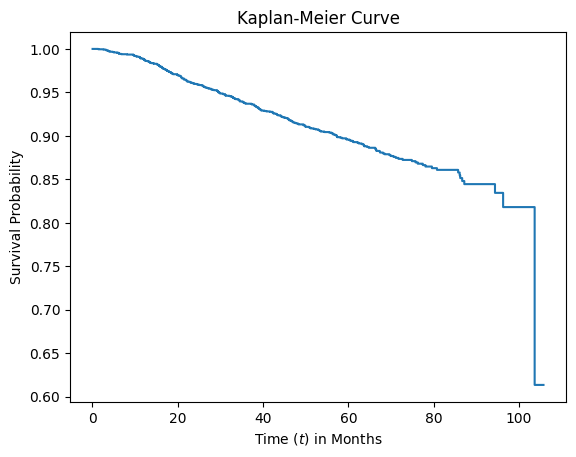

In [ ]:
# Main Kaplan Meier curve available in R.
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(train_data["disease_free_survival_status"], train_data["disease_free_survival_months"])
plt.step(time, survival_prob, where="post")
plt.xlabel('Time ($t$) in Months')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Curve')
plt.show()

In [ ]:
print(train_data["disease_free_survival_status"].astype(bool).unique())
print(train_data["disease_free_survival_status"].astype(bool).isna().sum())


[False  True]
0


In [ ]:
import numpy as np

train_data_y = np.empty(len(train_data), dtype=[('disease_free_survival_status', bool), ('disease_free_survival_months', float)])
train_data_y['disease_free_survival_status'] = train_data['disease_free_survival_status'].astype(bool)
train_data_y['disease_free_survival_months'] = train_data['disease_free_survival_months']

train_data_x = train_data.drop(columns=['disease_free_survival_status', 'disease_free_survival_months', 'mask_id'])

# Repeat for test data.

test_data_y = np.empty(len(test_data), dtype=[('disease_free_survival_status', bool), ('disease_free_survival_months', float)])
test_data_y['disease_free_survival_status'] = test_data['disease_free_survival_status'].astype(bool)
test_data_y['disease_free_survival_months'] = test_data['disease_free_survival_months']

test_data_x = test_data.drop(columns=['disease_free_survival_status', 'disease_free_survival_months', 'mask_id'])


In [ ]:
test_data_y_structured = np.array(list(zip(test_data_y["disease_free_survival_status"], test_data_y["disease_free_survival_months"])), dtype=[('Status', '?'), ('Time', '<f8')])

In [ ]:
# Define the structured array for training data
train_data_y_structured = np.array(list(zip(train_data_y["disease_free_survival_status"],
                                            train_data_y["disease_free_survival_months"])),
                                   dtype=[('Status', '?'), ('Time', '<f8')])

# Define the structured array for test data
test_data_y_structured = np.array(list(zip(test_data_y["disease_free_survival_status"],
                                           test_data_y["disease_free_survival_months"])),
                                  dtype=[('Status', '?'), ('Time', '<f8')])


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_data_x.values, i) for i in range(train_data_x.shape[1])]
vif["features"] = train_data_x.columns
print(vif)


    VIF Factor                                 features
0     1.009627                               race_asian
1     1.040552                               race_black
2     1.008049                               race_other
3     1.525755                           Treatment_CA_6
4     1.519470                            Treatment_T_4
5     1.513917                            Treatment_T_6
6     1.892920                          post_menopausal
7     1.022496                         tumor_side_right
8     1.025470                     tumor_side_bilateral
9     2.675932                   receptor_status_er_pos
10    2.497914                 receptor_status_pgrn_pos
11    2.504134                   histologic_grade_inter
12    3.006279                    histologic_grade_high
13    1.028368                          her2_status_pos
14    1.015040               prior_hormonal_therapy_yes
15    1.040271  most_extensive_primary_surgery_mast_NOS
16    1.044039                      tumor_size_2

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(test_data_x.values, i) for i in range(test_data_x.shape[1])]
vif["features"] = test_data_x.columns
print(vif)

    VIF Factor                                 features
0     1.032779                               race_asian
1     1.036230                               race_black
2     1.012871                               race_other
3     1.484387                           Treatment_CA_6
4     1.532502                            Treatment_T_4
5     1.528298                            Treatment_T_6
6     2.191860                          post_menopausal
7     1.051240                         tumor_side_right
8     1.053721                     tumor_side_bilateral
9     2.346178                   receptor_status_er_pos
10    2.195741                 receptor_status_pgrn_pos
11    2.408917                   histologic_grade_inter
12    2.920947                    histologic_grade_high
13    1.048992                          her2_status_pos
14    1.083858               prior_hormonal_therapy_yes
15    1.067408  most_extensive_primary_surgery_mast_NOS
16    1.070192                      tumor_size_2

In [ ]:
### Cross validation of the to x_train and y_train data to begin to assess
# whether the cox model is overfitting, i.e. by comparing whether the validation
# c-index is significantly higher than the test set index.
## I DONT KNOW IF THIS ACTUALLY MAKES SENSE OR IS USEFUL..

from sklearn.model_selection import cross_val_score
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from functools import partial

# Instantiate the model
estimator = CoxPHSurvivalAnalysis()

# Prepare a scoring function using the concordance_index_censored function
def ci_scoring_func(estimator, X, y):
    y_pred = estimator.predict(X)
    return concordance_index_censored(y["disease_free_survival_status"], y["disease_free_survival_months"], y_pred)[0]

# Perform cross-validation
scores = cross_val_score(estimator, train_data_x, train_data_y, cv=5, scoring=ci_scoring_func)

print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())


Cross-Validation Scores: [0.59464487 0.59215929 0.5916     0.56892898 0.60859691]
Average Cross-Validation Score: 0.5911860095732993


In [ ]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

# Instantiate and fit the model
estimator = CoxPHSurvivalAnalysis()
estimator.fit(train_data_x, train_data_y)

CoxPHSurvivalAnalysis()

In [ ]:
pd.Series(estimator.coef_, index=train_data_x.columns)

race_asian                                 0.071568
race_black                                 0.022148
race_other                                 0.024955
Treatment_CA_6                            -0.079539
Treatment_T_4                              0.037393
Treatment_T_6                             -0.015711
post_menopausal                            0.054077
tumor_side_right                          -0.017272
tumor_side_bilateral                       0.042910
receptor_status_er_pos                    -0.138339
receptor_status_pgrn_pos                  -0.112971
histologic_grade_inter                     0.216803
histologic_grade_high                      0.313054
her2_status_pos                           -0.089404
prior_hormonal_therapy_yes                 0.047878
most_extensive_primary_surgery_mast_NOS    0.042683
tumor_size_2_to_5cm                        0.165786
tumor_size_over_5cm                        0.150686
num_pos_nodes_1                            0.054085
num_pos_node

In [ ]:
import numpy as np

# Compute the hazard ratios from the coefficients
hazard_ratios = np.exp(estimator.coef_)

# Create a pandas Series that maps the feature names to their hazard ratios
hr_series = pd.Series(hazard_ratios, index=train_data_x.columns)

# Print the series
print(hr_series)

race_asian                                 1.074191
race_black                                 1.022395
race_other                                 1.025269
Treatment_CA_6                             0.923542
Treatment_T_4                              1.038101
Treatment_T_6                              0.984412
post_menopausal                            1.055565
tumor_side_right                           0.982876
tumor_side_bilateral                       1.043844
receptor_status_er_pos                     0.870804
receptor_status_pgrn_pos                   0.893176
histologic_grade_inter                     1.242099
histologic_grade_high                      1.367595
her2_status_pos                            0.914476
prior_hormonal_therapy_yes                 1.049043
most_extensive_primary_surgery_mast_NOS    1.043607
tumor_size_2_to_5cm                        1.180320
tumor_size_over_5cm                        1.162631
num_pos_nodes_1                            1.055575
num_pos_node

In [ ]:
from sksurv.metrics import concordance_index_censored

# using the transformed test_data in the same way as train_data and called it test_data_x
prediction = estimator.predict(test_data_x)

# assuming test_data_y is the corresponding structured array for the test data
result = concordance_index_censored(test_data_y["disease_free_survival_status"], test_data_y["disease_free_survival_months"], prediction)
print("Concordance Index on Test Data:", result[0])

Concordance Index on Test Data: 0.6401863896162401


/usr/local/lib/python3.10/dist-packages/sksurv/metrics.py:482: RuntimeWarning: invalid value encountered in divide
  true_pos = cumsum_tp / cumsum_tp[-1]


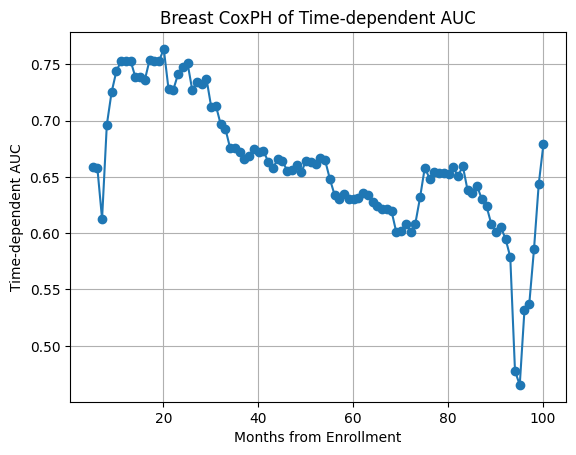

In [ ]:
from sksurv.metrics import cumulative_dynamic_auc
import matplotlib.pyplot as plt


# Calculate risk scores from the Cox proportional hazards model
risk_scores = estimator.predict(test_data_x)

# Define the evaluation times
eval_times = np.arange(test_data_y['disease_free_survival_months'].min(), test_data_y['disease_free_survival_months'].max())

# Compute the time-dependent AUC scores
cox_ph_auc, cox_ph_mean_auc = cumulative_dynamic_auc(train_data_y, test_data_y, risk_scores, eval_times)

# Plot the results
plt.plot(eval_times, cox_ph_auc, marker="o")
plt.axhline(cox_ph_mean_auc, linestyle="--")
plt.title("Breast CoxPH of Time-dependent AUC")
plt.xlabel("Months from Enrollment")
plt.ylabel("Time-dependent AUC")
plt.grid(True)
plt.show()

In [ ]:
print(test_data_y_structured[:3])

[(False, 95.34291581) (False, 29.24024641) (False, 63.83572895)]


In [ ]:
def fit_and_score_features(X, y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j : j + 1]
        m.fit(Xj, y)
        scores[j] = m.score(Xj, y)
    return scores


scores = fit_and_score_features(train_data_x.values, train_data_y)
pd.Series(scores, index=train_data_x.columns).sort_values(ascending=False)

receptor_status_pgrn_pos                   0.581980
receptor_status_er_pos                     0.578711
histologic_grade_high                      0.572647
tumor_size_2_to_5cm                        0.556122
histologic_grade_inter                     0.537463
post_menopausal                            0.529857
age_over_fifty                             0.519987
most_extensive_primary_surgery_mast_NOS    0.515406
race_black                                 0.513340
Treatment_CA_6                             0.512508
her2_status_pos                            0.511820
tumor_size_over_5cm                        0.510702
tumor_side_right                           0.509292
num_pos_nodes_2+                           0.507473
Treatment_T_4                              0.504868
Treatment_T_6                              0.504361
race_asian                                 0.503570
prior_hormonal_therapy_yes                 0.502415
race_other                                 0.501945
tumor_side_b

In [ ]:
# Define the structured array for training data
train_data_y_structured = np.array(list(zip(train_data_y["disease_free_survival_status"],
                                            train_data_y["disease_free_survival_months"])),
                                   dtype=[('Status', '?'), ('Time', '<f8')])

# Define the structured array for test data
test_data_y_structured = np.array(list(zip(test_data_y["disease_free_survival_status"],
                                           test_data_y["disease_free_survival_months"])),
                                  dtype=[('Status', '?'), ('Time', '<f8')])


In [ ]:
# None of the analysis between here and the data preparation is necessary, I dont think 2/8/23
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import concordance_index_censored, integrated_brier_score
import numpy as np

# Instantiate and fit the model
estimator = CoxPHSurvivalAnalysis()
estimator.fit(train_data_x, train_data_y)

# Use the trained model to predict the survival function on the test set
survival_functions = estimator.predict_survival_function(test_data_x)

# Create structured arrays for train and test data
train_data_y_structured = np.array(list(zip(train_data_y["disease_free_survival_status"], train_data_y["disease_free_survival_months"])), dtype=[('Status', '?'), ('Time', '<f8')])
test_data_y_structured = np.array(list(zip(test_data_y["disease_free_survival_status"], test_data_y["disease_free_survival_months"])), dtype=[('Status', '?'), ('Time', '<f8')])

# Define the time points at which you want to calculate Brier score based on test data time range.
times = np.linspace(test_data_y_structured["Time"].min(), test_data_y_structured["Time"].max(), 100, endpoint=False)

# Convert the survival functions to the expected 2-D array-like format
survival_array = np.asarray([fn(times).flatten() for fn in survival_functions])

# using the transformed test_data in the same way as train_data and called it test_data_x
prediction = estimator.predict(test_data_x)

# assuming test_data_y is the corresponding structured array for the test data
result = concordance_index_censored(test_data_y["disease_free_survival_status"], test_data_y["disease_free_survival_months"], prediction)
print("Concordance Index on Test Data:", result[0])

# Compute the IBS
ibs = integrated_brier_score(survival_train=train_data_y_structured, survival_test=test_data_y_structured, estimate=survival_array, times=times)

print('Integrated Brier Score:', ibs)


Concordance Index on Test Data: 0.6401863896162401
Integrated Brier Score: 0.0808263291148235


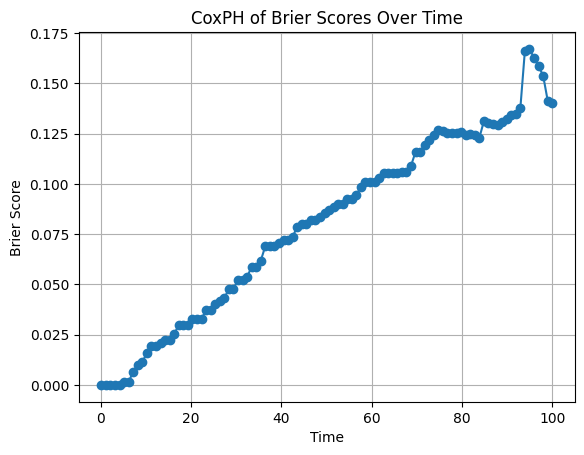

/usr/local/lib/python3.10/dist-packages/sksurv/metrics.py:482: RuntimeWarning: invalid value encountered in divide
  true_pos = cumsum_tp / cumsum_tp[-1]


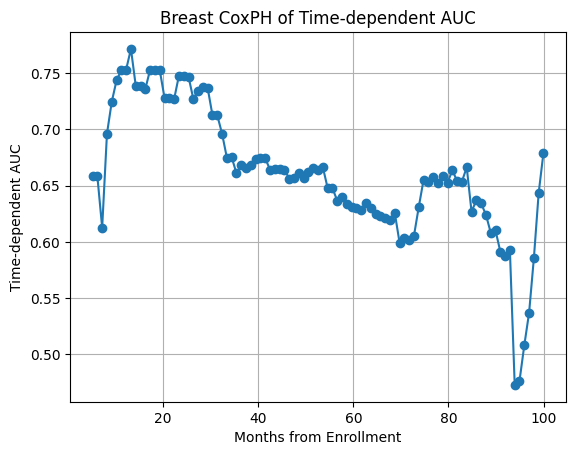

In [ ]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import concordance_index_censored, integrated_brier_score, brier_score, cumulative_dynamic_auc
import numpy as np
import matplotlib.pyplot as plt

# Convert the survival functions to the expected 2-D array-like format
survival_array = np.asarray([fn(times).flatten() for fn in survival_functions])

# Compute the Brier score at each time point
coxph_brier_score_times, coxph_brier_scores = brier_score(survival_train=train_data_y_structured, survival_test=test_data_y_structured, estimate=survival_array, times=times)

# Plot the Brier scores
plt.plot(coxph_brier_score_times, coxph_brier_scores, marker="o")
plt.title("CoxPH of Brier Scores Over Time")
plt.xlabel("Time")
plt.ylabel("Brier Score")
plt.grid(True)
plt.show()

# Compute the time-dependent AUC scores
cox_ph_auc, cox_ph_mean_auc = cumulative_dynamic_auc(train_data_y, test_data_y, prediction, times)

# Plot the results
plt.plot(times, cox_ph_auc, marker="o")
plt.axhline(cox_ph_mean_auc, linestyle="--")
plt.title("Breast CoxPH of Time-dependent AUC")
plt.xlabel("Months from Enrollment")
plt.ylabel("Time-dependent AUC")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

cox_ph_times = times
# save the numpy arrays to the specified directory
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/coxph_brier_score_times.npy', coxph_brier_score_times)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/coxph_brier_scores.npy', coxph_brier_scores)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/cox_ph_auc.npy', cox_ph_auc)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/cox_ph_mean_auc.npy', cox_ph_mean_auc)


np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/cox_ph_times.npy', cox_ph_times)


In [ ]:
# This is the one I'm going with. 2/8/23
from sklearn.utils import resample
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import concordance_index_censored, integrated_brier_score
import numpy as np

# Cox Model with bootstrap resampling
n_bootstrap_iterations = 200
bootstrap_c_indices_cox = np.zeros(n_bootstrap_iterations)
bootstrap_ibs_cox = np.zeros(n_bootstrap_iterations)

times = np.linspace(test_data_y_structured["Time"].min(), test_data_y_structured["Time"].max(), 100, endpoint=False)

for i in range(n_bootstrap_iterations):
    bootstrap_indices = resample(np.arange(len(train_data_x)), replace=True)
    bootstrap_train_x = train_data_x.iloc[bootstrap_indices]
    bootstrap_train_y = train_data_y_structured[bootstrap_indices]

    # Instantiate and fit the model using bootstrap_train_x and bootstrap_train_y
    estimator = CoxPHSurvivalAnalysis()
    estimator.fit(bootstrap_train_x, bootstrap_train_y)

    # Use the trained model to predict the survival function on the test set
    survival_functions = estimator.predict_survival_function(test_data_x)

    # Convert the survival functions to the expected 2-D array-like format
    survival_array = np.asarray([fn(times).flatten() for fn in survival_functions])

    # Make predictions using the bootstrap trained estimator
    prediction = estimator.predict(test_data_x)

    # Compute Concordance Index and Integrated Brier Score for each bootstrap iteration
    result = concordance_index_censored(test_data_y_structured["Status"], test_data_y_structured["Time"], prediction)
    bootstrap_c_indices_cox[i] = result[0]
    ibs = integrated_brier_score(survival_train=bootstrap_train_y, survival_test=test_data_y_structured, estimate=survival_array, times=times)
    bootstrap_ibs_cox[i] = ibs

# Compute the confidence intervals
lower_percentile_c_index = np.percentile(bootstrap_c_indices_cox, 2.5)
upper_percentile_c_index = np.percentile(bootstrap_c_indices_cox, 97.5)
lower_percentile_ibs = np.percentile(bootstrap_ibs_cox, 2.5)
upper_percentile_ibs = np.percentile(bootstrap_ibs_cox, 97.5)

print('Bootstrap 95% confidence interval for the C-index: ({:.2f}, {:.2f})'.format(lower_percentile_c_index, upper_percentile_c_index))
print('Bootstrap 95% confidence interval for the IBS: ({:.2f}, {:.2f})'.format(lower_percentile_ibs, upper_percentile_ibs))


Bootstrap 95% confidence interval for the C-index: (0.58, 0.67)
Bootstrap 95% confidence interval for the IBS: (0.08, 0.08)


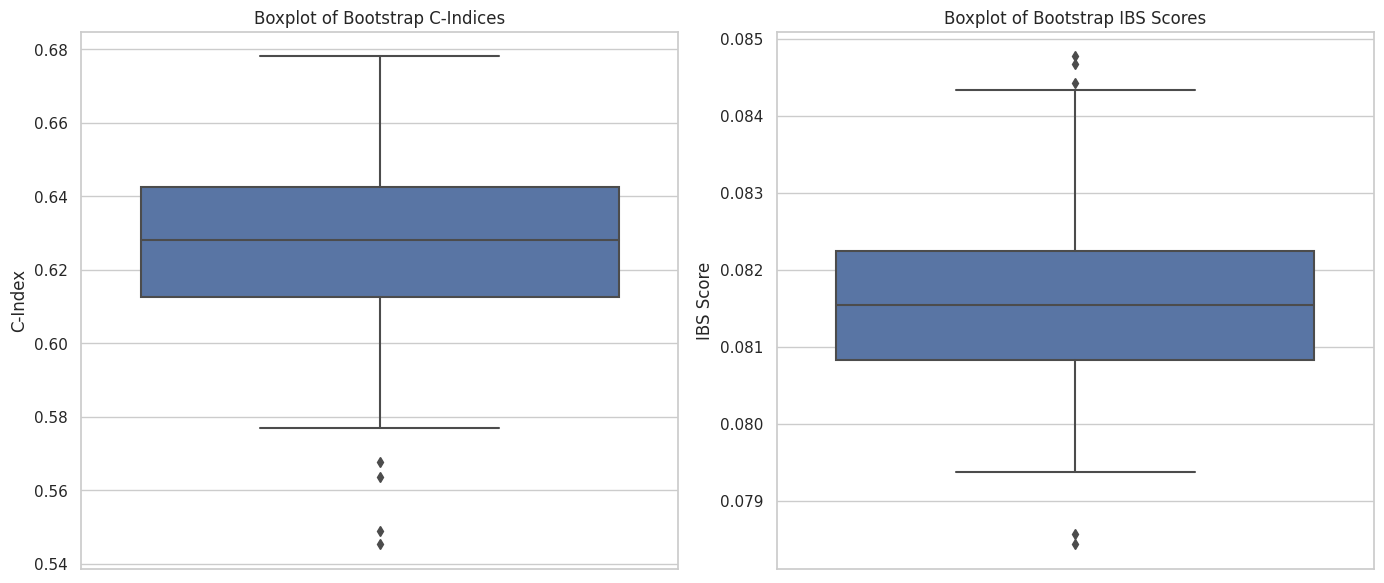

In [ ]:
# Increasing recommended boostrap iterations to 1000. On training dataset only. This is the one I'm going with.2/8/23

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(14, 6))

# Subplot for C-index
plt.subplot(1, 2, 1)
sns.boxplot(y=bootstrap_c_indices_cox)
plt.title("Boxplot of Bootstrap C-Indices")
plt.ylabel("C-Index")

# Subplot for IBS
plt.subplot(1, 2, 2)
sns.boxplot(y=bootstrap_ibs_cox)
plt.title("Boxplot of Bootstrap IBS Scores")
plt.ylabel("IBS Score")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Confidence_intervals_breast_IBS_cindex/bootstrap_c_indices_coxph.npy', bootstrap_c_indices_cox)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Confidence_intervals_breast_IBS_cindex/bootstrap_ibs_coxph.npy', bootstrap_ibs_cox)

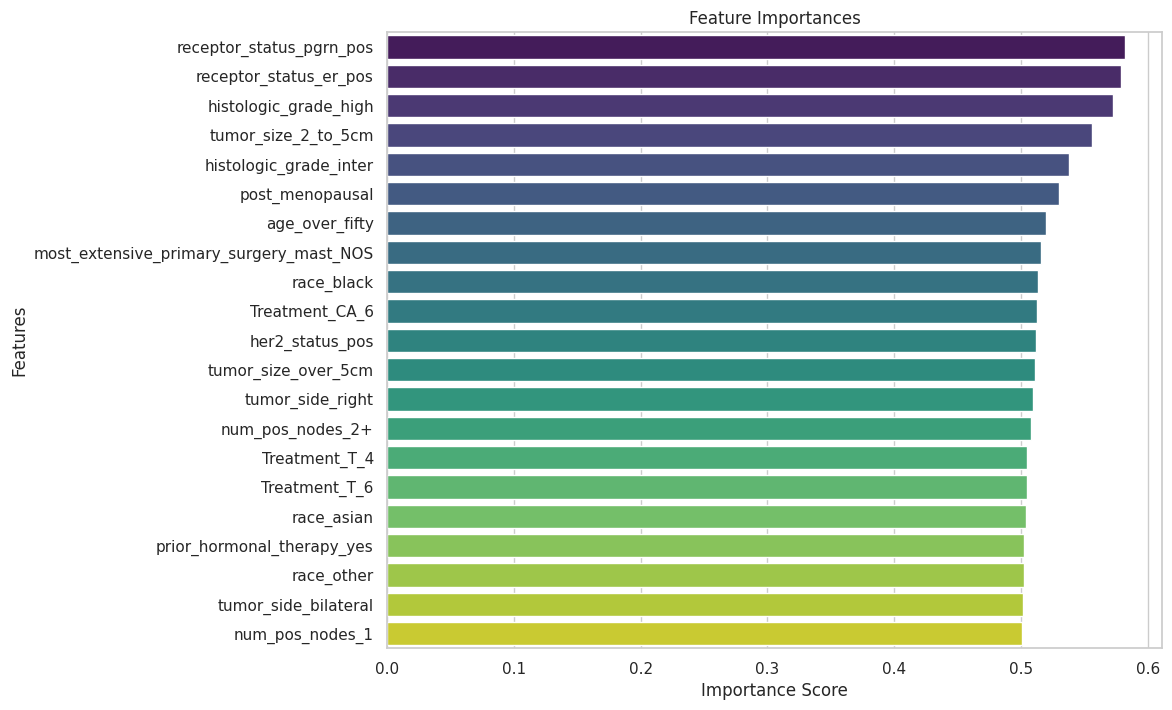

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# I'm assuming scores are the feature importances that you've calculated from your model
importance_scores = pd.Series(scores, index=train_data_x.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))  # Increase the size as per your requirement
sns.barplot(x=importance_scores.values, y=importance_scores.index, palette='viridis')

plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
## Calculating both the C-index and the Brier Scores and timings for Ridge


from sklearn.base import BaseEstimator
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.metrics import concordance_index_censored, integrated_brier_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np
import time

# Define a custom class with score method
class CoxnetSurvivalAnalysisWithScore(CoxnetSurvivalAnalysis):
    def score(self, X, y):
        prediction = self.predict(X)
        event_indicator = y['disease_free_survival_status']
        event_time = y['disease_free_survival_months']
        result = concordance_index_censored(event_indicator, event_time, prediction)
        return result[0]

# Define the model
estimator = CoxnetSurvivalAnalysisWithScore(l1_ratio=0.0001)

# Define the hyperparameters grid (you might need to tune the range)
alphas_range = {'alphas': [[0.0001], [0.001], [0.01], [0.1], [1.0], [10.0], [100.0]]}

# Use GridSearchCV to search the hyperparameters space
start_time = time.time()
grid = GridSearchCV(estimator, alphas_range, cv=5)
grid.fit(train_data_x, train_data_y)
end_time = time.time()

# Print the best parameter
print("Best Alpha:", grid.best_params_)

# Fit the estimator with the best parameters
start_train_time = time.time()
estimator_best = CoxnetSurvivalAnalysisWithScore(l1_ratio=0.0001, alphas=grid.best_params_['alphas'], fit_baseline_model=True)
estimator_best.fit(train_data_x, train_data_y)
end_train_time = time.time()

# Predict
start_test_time = time.time()
prediction = estimator_best.predict(test_data_x)
end_test_time = time.time()

# Calculate and print the Concordance Index
result = concordance_index_censored(test_data_y["disease_free_survival_status"], test_data_y["disease_free_survival_months"], prediction)
print("Concordance Index on Test Data:", result[0])

# Predict the survival function on the test set
start_survival_time = time.time()
survival_functions = estimator_best.predict_survival_function(test_data_x)
end_survival_time = time.time()

# Create structured arrays for train and test data
train_data_y_structured = np.array(list(zip(train_data_y["disease_free_survival_status"], train_data_y["disease_free_survival_months"])), dtype=[('Status', '?'), ('Time', '<f8')])
test_data_y_structured = np.array(list(zip(test_data_y["disease_free_survival_status"], test_data_y["disease_free_survival_months"])), dtype=[('Status', '?'), ('Time', '<f8')])

# Define the time points at which you want to calculate Brier score based on test data time range.
times = np.linspace(test_data_y_structured["Time"].min(), test_data_y_structured["Time"].max(), 100, endpoint=False)

# Convert the survival functions to the expected 2-D array-like format
survival_array = np.asarray([fn(times).flatten() for fn in survival_functions])

# Compute the IBS
start_ibs_time = time.time()
ibs = integrated_brier_score(survival_train=train_data_y_structured, survival_test=test_data_y_structured, estimate=survival_array, times=times)
end_ibs_time = time.time()

print('Integrated Brier Score:', ibs)

# Print timing information
print("Time for GridSearchCV (Tuning):", end_time - start_time)
print("Time for Model Training:", end_train_time - start_train_time)
print("Time for Model Testing:", end_test_time - start_test_time)
print("Time for Predicting Survival Function:", end_survival_time - start_survival_time)
print("Time for Integrated Brier Score Calculation:", end_ibs_time - start_ibs_time)


Best Alpha: {'alphas': [100.0]}
Concordance Index on Test Data: 0.6697496973280401
Integrated Brier Score: 0.08248213297553696
Time for GridSearchCV (Tuning): 0.5933632850646973
Time for Model Training: 0.024250507354736328
Time for Model Testing: 0.0023262500762939453
Time for Predicting Survival Function: 0.06772828102111816
Time for Integrated Brier Score Calculation: 0.008227825164794922


/usr/local/lib/python3.10/dist-packages/sksurv/metrics.py:482: RuntimeWarning: invalid value encountered in divide
  true_pos = cumsum_tp / cumsum_tp[-1]


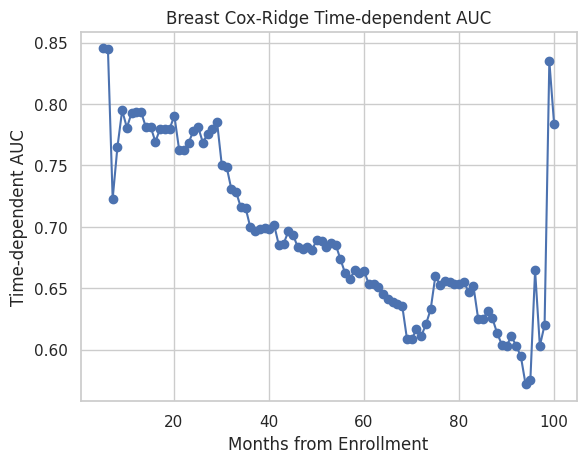

In [ ]:
from sksurv.metrics import cumulative_dynamic_auc
import matplotlib.pyplot as plt

# Calculate risk scores from the Cox ridge model
risk_scores = estimator_best.predict(test_data_x)

# Define the evaluation times
eval_times = np.arange(test_data_y['disease_free_survival_months'].min(), test_data_y['disease_free_survival_months'].max())

# Compute the time-dependent AUC scores
auc, mean_auc = cumulative_dynamic_auc(train_data_y_structured, test_data_y_structured, risk_scores, eval_times)

# Plot the results
plt.plot(eval_times, auc, marker="o")
plt.axhline(mean_auc, linestyle="--")
plt.title("Breast Cox-Ridge Time-dependent AUC")
plt.xlabel("Months from Enrollment")
plt.ylabel("Time-dependent AUC")
plt.grid(True)
plt.show()





/usr/local/lib/python3.10/dist-packages/sksurv/metrics.py:482: RuntimeWarning: invalid value encountered in divide
  true_pos = cumsum_tp / cumsum_tp[-1]


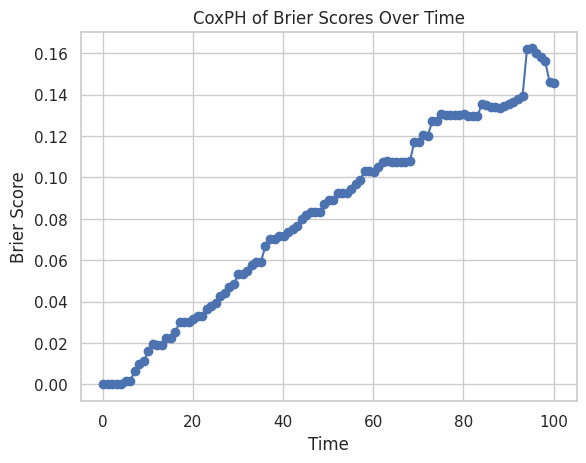

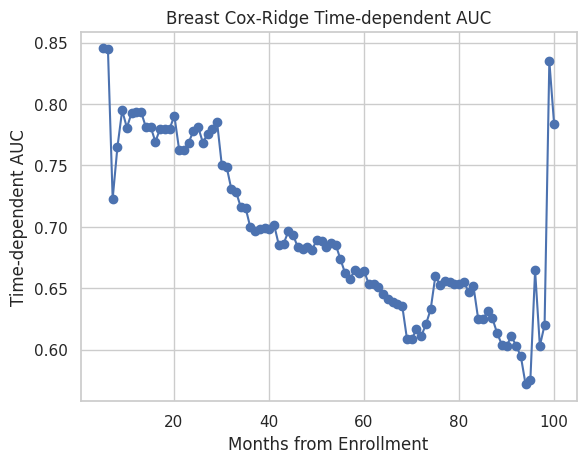

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import concordance_index_censored, integrated_brier_score, brier_score, cumulative_dynamic_auc

# Assuming you have already trained and obtained the Cox ridge model called 'estimator_best'
# and 'test_data_x', 'test_data_y_structured' are the test features and target in the structured format.

# Calculate risk scores from the Cox ridge model
risk_scores = estimator_best.predict(test_data_x)

# Define the evaluation times
eval_times = np.arange(test_data_y['disease_free_survival_months'].min(), test_data_y['disease_free_survival_months'].max())

# Compute the time-dependent AUC scores
ridge_auc, ridge_mean_auc = cumulative_dynamic_auc(train_data_y_structured, test_data_y_structured, risk_scores, eval_times)

# Convert the survival functions to the expected 2-D array-like format
survival_array = np.asarray([fn(eval_times).flatten() for fn in survival_functions])  # Make sure to define 'survival_functions' before this line

# Compute the Brier score at each time point
ridge_brier_score_times, ridge_brier_scores = brier_score(survival_train=train_data_y_structured, survival_test=test_data_y_structured, estimate=survival_array, times=eval_times)

# Plot the results for the Brier score
plt.figure()
plt.plot(ridge_brier_score_times, ridge_brier_scores, marker="o")
plt.title("CoxPH of Brier Scores Over Time")
plt.xlabel("Time")
plt.ylabel("Brier Score")
plt.grid(True)
plt.show()

# Plot the results for the time-dependent AUC
plt.figure()
plt.plot(eval_times, ridge_auc, marker="o")
plt.axhline(ridge_mean_auc, linestyle="--")
plt.title("Breast Cox-Ridge Time-dependent AUC")
plt.xlabel("Months from Enrollment")
plt.ylabel("Time-dependent AUC")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# save the numpy arrays to the specified directory
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/ridge_mean_auc.npy', ridge_mean_auc)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/ridge_auc.npy', ridge_auc)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/ridge_brier_score_times.npy', ridge_brier_score_times)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/ridge_brier_scores.npy', ridge_brier_scores)

ridge_times = eval_times

np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/ridge_times.npy', ridge_times)


In [ ]:
from sklearn.utils import resample

# Create structured arrays for train and test data
train_data_y_structured = np.array(list(zip(train_data_y["disease_free_survival_status"], train_data_y["disease_free_survival_months"])), dtype=[('Status', '?'), ('Time', '<f8')])
test_data_y_structured = np.array(list(zip(test_data_y["disease_free_survival_status"], test_data_y["disease_free_survival_months"])), dtype=[('Status', '?'), ('Time', '<f8')])

# Define the time points at which you want to calculate Brier score based on test data time range.
times = np.linspace(test_data_y_structured["Time"].min(), test_data_y_structured["Time"].max(), 100, endpoint=False)

# Number of bootstrap iterations
n_bootstrap = 200

# Store results
bootstrap_c_indices_ridge = []
bootstrap_ibs_ridge = []

# Resampling and model fitting with the best parameters
for i in range(n_bootstrap):
    X_resample, y_resample = resample(train_data_x, train_data_y)

    # Fit the model with resampled data
    estimator_best = CoxnetSurvivalAnalysisWithScore(l1_ratio=0.0001, alphas=grid.best_params_['alphas'], fit_baseline_model=True)
    estimator_best.fit(X_resample, y_resample)

    # Predict on the original test set
    prediction = estimator_best.predict(test_data_x)

    # Calculate the Concordance Index
    result = concordance_index_censored(test_data_y["disease_free_survival_status"], test_data_y["disease_free_survival_months"], prediction)

    # Predict the survival function on the test set
    survival_functions = estimator_best.predict_survival_function(test_data_x)
    # Convert the survival functions to the expected 2-D array-like format
    survival_array = np.asarray([fn(times).flatten() for fn in survival_functions])

    # Compute the IBS
    ibs = integrated_brier_score(survival_train=y_resample, survival_test=test_data_y_structured, estimate=survival_array, times=times)

    # Store the metrics
    bootstrap_c_indices_ridge.append(result[0])
    bootstrap_ibs_ridge.append(ibs)
# Ridge boostrapped resample

lower_percentile_c_index = np.percentile(bootstrap_c_indices_ridge, 2.5)
upper_percentile_c_index = np.percentile(bootstrap_c_indices_ridge, 97.5)
lower_percentile_ibs = np.percentile(bootstrap_ibs_ridge, 2.5)
upper_percentile_ibs = np.percentile(bootstrap_ibs_ridge, 97.5)

print('Bootstrap 95% confidence interval for the C-index: ({:.2f}, {:.2f})'.format(lower_percentile_c_index, upper_percentile_c_index))
print('Bootstrap 95% confidence interval for the IBS: ({:.2f}, {:.2f})'.format(lower_percentile_ibs, upper_percentile_ibs))

Bootstrap 95% confidence interval for the C-index: (0.62, 0.68)
Bootstrap 95% confidence interval for the IBS: (0.08, 0.08)


Text(0, 0.5, 'IBS Score')

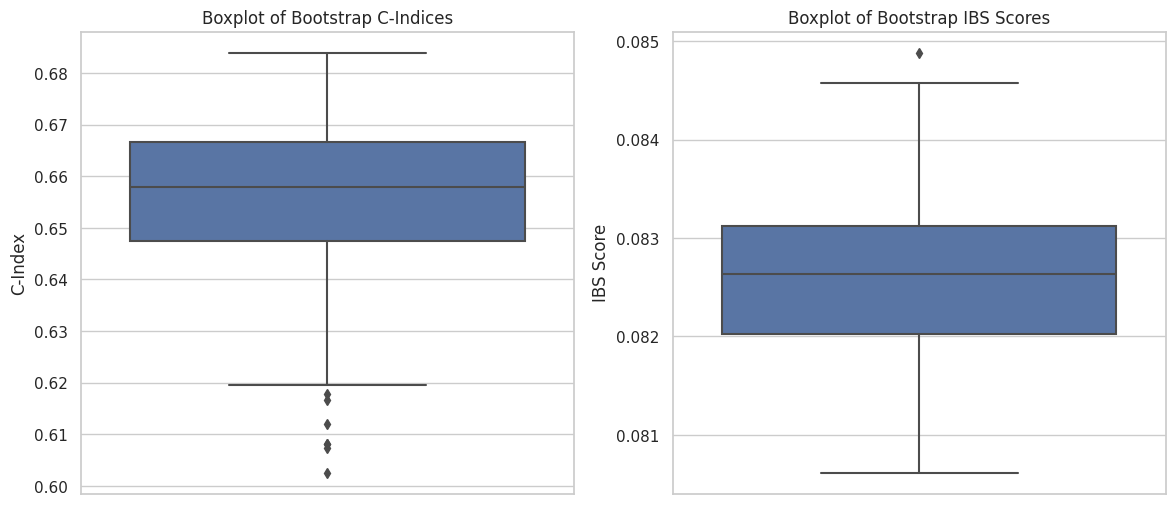

In [ ]:
### Ridge Boostrap estimate

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(14, 6))

# Subplot for C-index
plt.subplot(1, 2, 1)
sns.boxplot(y=bootstrap_c_indices_ridge)
plt.title("Boxplot of Bootstrap C-Indices")
plt.ylabel("C-Index")

# Subplot for IBS
plt.subplot(1, 2, 2)
sns.boxplot(y=bootstrap_ibs_ridge)
plt.title("Boxplot of Bootstrap IBS Scores")
plt.ylabel("IBS Score")

In [ ]:
### Saving the confidence intervals for the c-indices and IBSs.
import numpy as np

np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Confidence_intervals_breast_IBS_cindex/bootstrap_c_indices_ridge.npy', bootstrap_c_indices_ridge)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Confidence_intervals_breast_IBS_cindex/bootstrap_ibs_ridge.npy', bootstrap_ibs_ridge)

Best Alpha: {'alphas': [100.0]}


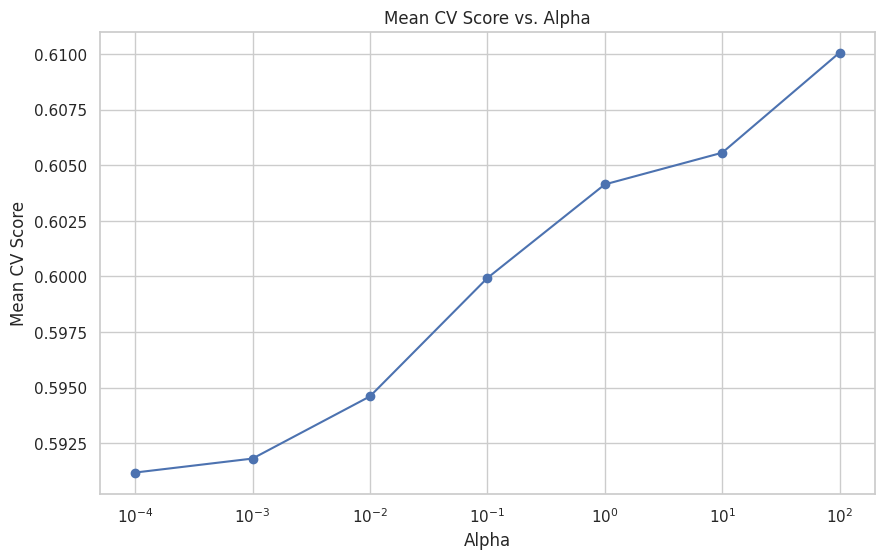

In [ ]:
import matplotlib.pyplot as plt

# Fit the GridSearchCV
grid.fit(train_data_x, train_data_y)

# Print the best parameter
print("Best Alpha:", grid.best_params_)

# Plot
mean_scores = grid.cv_results_['mean_test_score']
alphas = [params['alphas'][0] for params in grid.cv_results_['params']]

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, mean_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean CV Score')
plt.title('Mean CV Score vs. Alpha')
plt.grid(True)
plt.show()


In [ ]:
#### Brier Score, C-index and timings for LASSO

from sklearn.base import BaseEstimator
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.metrics import concordance_index_censored, integrated_brier_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np
import time

# Define a custom class with score method
class CoxnetSurvivalAnalysisWithScore(CoxnetSurvivalAnalysis):
    def score(self, X, y):
        prediction = self.predict(X)
        event_indicator = y['disease_free_survival_status']
        event_time = y['disease_free_survival_months']
        result = concordance_index_censored(event_indicator, event_time, prediction)
        return result[0]

# Define the model
estimator = CoxnetSurvivalAnalysisWithScore(l1_ratio=1)

# Define the hyperparameters grid (you might need to tune the range)
alphas_range = {'alphas': [[0.0001], [0.001], [0.01], [0.1], [1.0], [10.0], [100.0]]}

# Use GridSearchCV to search the hyperparameters space
start_time = time.time()
grid = GridSearchCV(estimator, alphas_range, cv=5)
grid.fit(train_data_x, train_data_y)
end_time = time.time()

# Print the best parameter
print("Best Alpha:", grid.best_params_)

# Fit the estimator with the best parameters
start_train_time = time.time()
estimator_best = CoxnetSurvivalAnalysisWithScore(l1_ratio=1, alphas=grid.best_params_['alphas'], fit_baseline_model=True)
estimator_best.fit(train_data_x, train_data_y)
end_train_time = time.time()

# Predict
start_test_time = time.time()
prediction = estimator_best.predict(test_data_x)
end_test_time = time.time()

# Calculate and print the Concordance Index
result = concordance_index_censored(test_data_y["disease_free_survival_status"], test_data_y["disease_free_survival_months"], prediction)
print("Concordance Index on Test Data:", result[0])

# Predict the survival function on the test set
start_survival_time = time.time()
survival_functions = estimator_best.predict_survival_function(test_data_x)
end_survival_time = time.time()

# Create structured arrays for train and test data
train_data_y_structured = np.array(list(zip(train_data_y["disease_free_survival_status"], train_data_y["disease_free_survival_months"])), dtype=[('Status', '?'), ('Time', '<f8')])
test_data_y_structured = np.array(list(zip(test_data_y["disease_free_survival_status"], test_data_y["disease_free_survival_months"])), dtype=[('Status', '?'), ('Time', '<f8')])

# Define the time points at which you want to calculate Brier score based on test data time range.
times = np.linspace(test_data_y_structured["Time"].min(), test_data_y_structured["Time"].max(), 100, endpoint=False)

# Convert the survival functions to the expected 2-D array-like format
survival_array = np.asarray([fn(times).flatten() for fn in survival_functions])

# Compute the IBS
start_ibs_time = time.time()
ibs = integrated_brier_score(survival_train=train_data_y_structured, survival_test=test_data_y_structured, estimate=survival_array, times=times)
end_ibs_time = time.time()

print('Integrated Brier Score:', ibs)

# Print timing information
print("Time for GridSearchCV (Tuning):", end_time - start_time)
print("Time for Model Training:", end_train_time - start_train_time)
print("Time for Model Testing:", end_test_time - start_test_time)
print("Time for Predicting Survival Function:", end_survival_time - start_survival_time)
print("Time for Integrated Brier Score Calculation:", end_ibs_time - start_ibs_time)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/

Best Alpha: {'alphas': [0.01]}
Concordance Index on Test Data: 0.6814483205225667
Integrated Brier Score: 0.0805839437704541
Time for GridSearchCV (Tuning): 1.1494157314300537
Time for Model Training: 0.04293990135192871
Time for Model Testing: 0.010219573974609375
Time for Predicting Survival Function: 0.15057826042175293
Time for Integrated Brier Score Calculation: 0.01548147201538086


/usr/local/lib/python3.10/dist-packages/sksurv/metrics.py:482: RuntimeWarning: invalid value encountered in divide
  true_pos = cumsum_tp / cumsum_tp[-1]


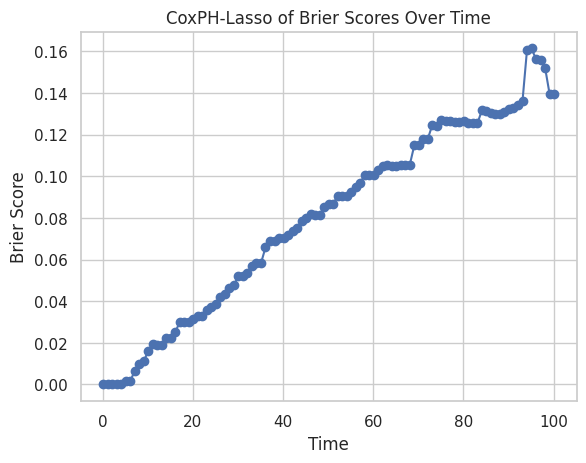

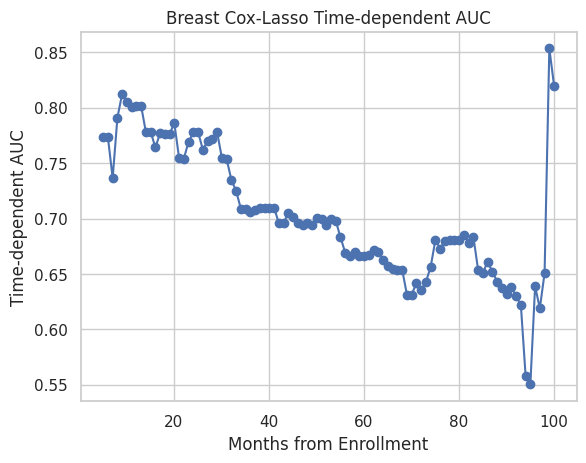

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import concordance_index_censored, integrated_brier_score, brier_score, cumulative_dynamic_auc

# Calculate risk scores from the LASSO model
risk_scores = estimator_best.predict(test_data_x)

# Define the evaluation times
eval_times = np.arange(test_data_y['disease_free_survival_months'].min(), test_data_y['disease_free_survival_months'].max())

# Compute the time-dependent AUC scores
lasso_auc, lasso_mean_auc = cumulative_dynamic_auc(train_data_y_structured, test_data_y_structured, risk_scores, eval_times)

# Convert the survival functions to the expected 2-D array-like format
survival_array = np.asarray([fn(eval_times).flatten() for fn in survival_functions])  # Make sure to define 'survival_functions' before this line

# Compute the Brier score at each time point
lasso_brier_score_times, lasso_brier_scores = brier_score(survival_train=train_data_y_structured, survival_test=test_data_y_structured, estimate=survival_array, times=eval_times)

# Plot the results for the Brier score
plt.figure()
plt.plot(lasso_brier_score_times, lasso_brier_scores, marker="o")
plt.title("CoxPH-Lasso of Brier Scores Over Time")
plt.xlabel("Time")
plt.ylabel("Brier Score")
plt.grid(True)
plt.show()

# Plot the results for the time-dependent AUC
plt.figure()
plt.plot(eval_times, lasso_auc, marker="o")
plt.axhline(lasso_mean_auc, linestyle="--")
plt.title("Breast Cox-Lasso Time-dependent AUC")
plt.xlabel("Months from Enrollment")
plt.ylabel("Time-dependent AUC")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# save the numpy arrays to the specified directory
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/lasso_mean_auc.npy', lasso_mean_auc)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/lasso_auc.npy', lasso_auc)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/lasso_brier_score_times.npy', lasso_brier_score_times)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/lasso_brier_scores.npy', lasso_brier_scores)


In [ ]:
from sklearn.utils import resample
from sksurv.metrics import concordance_index_censored, integrated_brier_score
import numpy as np

# Define your already tuned model with optimal hyperparameters
estimator_best = CoxnetSurvivalAnalysisWithScore(l1_ratio=1, alphas=grid.best_params_['alphas'], fit_baseline_model=True)

n_bootstrap_iterations = 200
bootstrap_c_indices_lasso = np.zeros(n_bootstrap_iterations)
bootstrap_ibs_lasso = np.zeros(n_bootstrap_iterations)

times = np.linspace(test_data_y_structured["Time"].min(), test_data_y_structured["Time"].max(), 100, endpoint=False)

for i in range(n_bootstrap_iterations):
    bootstrap_indices = resample(np.arange(len(train_data_x)), replace=True)
    bootstrap_train_x = train_data_x.iloc[bootstrap_indices]
    bootstrap_train_y = train_data_y_structured[bootstrap_indices]

    estimator_best.fit(bootstrap_train_x, bootstrap_train_y)

    prediction = estimator_best.predict(test_data_x)
    survival_functions = estimator_best.predict_survival_function(test_data_x)
    survival_array = np.asarray([fn(times).flatten() for fn in survival_functions])

    result = concordance_index_censored(test_data_y_structured["Status"], test_data_y_structured["Time"], prediction)
    bootstrap_c_indices_lasso[i] = result[0]

    ibs = integrated_brier_score(survival_train=bootstrap_train_y, survival_test=test_data_y_structured, estimate=survival_array, times=times)
    bootstrap_ibs_lasso[i] = ibs

lower_percentile_c_index = np.percentile(bootstrap_c_indices_lasso, 2.5)
upper_percentile_c_index = np.percentile(bootstrap_c_indices_lasso, 97.5)
lower_percentile_ibs = np.percentile(bootstrap_ibs_lasso, 2.5)
upper_percentile_ibs = np.percentile(bootstrap_ibs_lasso, 97.5)

print('Bootstrap 95% confidence interval for the C-index: ({:.2f}, {:.2f})'.format(lower_percentile_c_index, upper_percentile_c_index))
print('Bootstrap 95% confidence interval for the IBS: ({:.2f}, {:.2f})'.format(lower_percentile_ibs, upper_percentile_ibs))


Bootstrap 95% confidence interval for the C-index: (0.60, 0.69)
Bootstrap 95% confidence interval for the IBS: (0.08, 0.08)


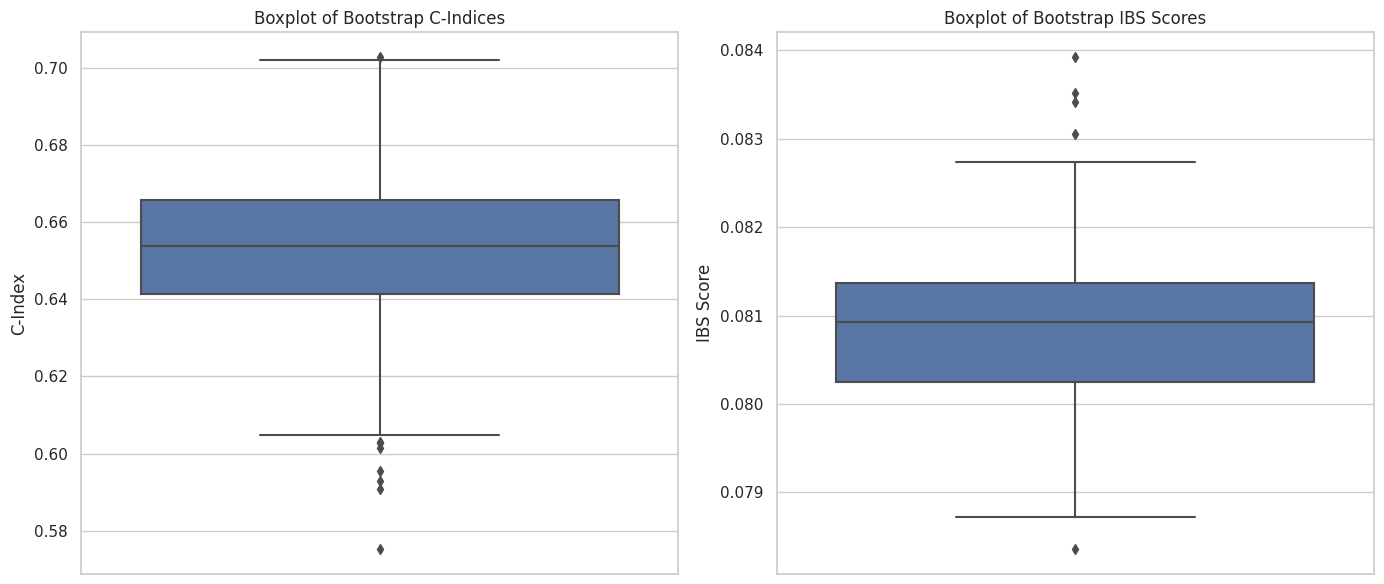

In [ ]:
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(14, 6))

# Subplot for C-index
plt.subplot(1, 2, 1)
sns.boxplot(y=bootstrap_c_indices_lasso)
plt.title("Boxplot of Bootstrap C-Indices")
plt.ylabel("C-Index")

# Subplot for IBS
plt.subplot(1, 2, 2)
sns.boxplot(y=bootstrap_ibs_lasso)
plt.title("Boxplot of Bootstrap IBS Scores")
plt.ylabel("IBS Score")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
### Saving the confidence intervals for the c-indices and IBSs
import numpy as np

# save the numpy arrays to the specified directory

np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Confidence_intervals_breast_IBS_cindex/bootstrap_c_indices_lasso.npy', bootstrap_c_indices_lasso)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Confidence_intervals_breast_IBS_cindex/bootstrap_ibs_lasso.npy', bootstrap_ibs_lasso)





/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/

Best Alpha: {'alphas': [0.01]}


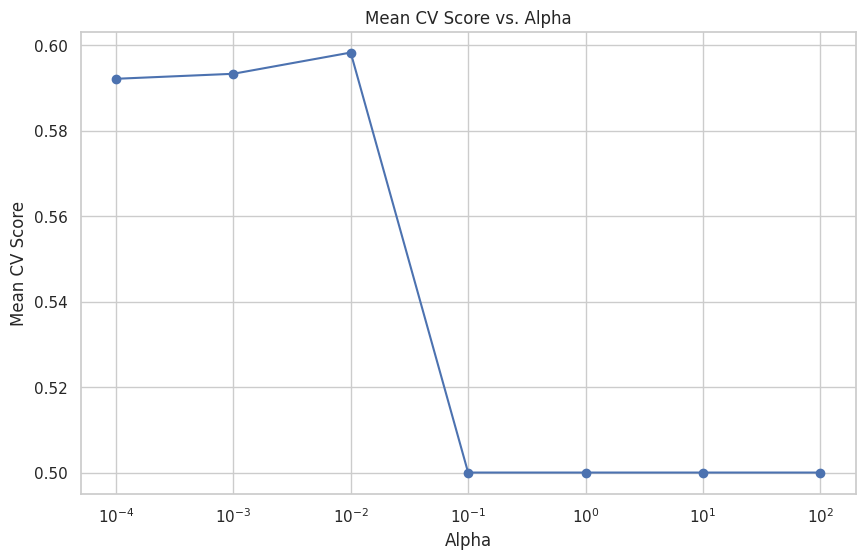

In [ ]:
import matplotlib.pyplot as plt
### Plotting the tuning of alpha

# Fit the GridSearchCV
grid.fit(train_data_x, train_data_y)

# Print the best parameter
print("Best Alpha:", grid.best_params_)

# Plot
mean_scores = grid.cv_results_['mean_test_score']
alphas = [params['alphas'][0] for params in grid.cv_results_['params']]

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, mean_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean CV Score')
plt.title('Mean CV Score vs. Alpha')
plt.grid(True)
plt.show()


In [ ]:
## Elastic NEt
from sklearn.base import BaseEstimator
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time

# Define a custom class with score method
class CoxnetSurvivalAnalysisWithScore(CoxnetSurvivalAnalysis):
    def score(self, X, y):
        prediction = self.predict(X)
        event_indicator = y['disease_free_survival_status']
        event_time = y['disease_free_survival_months']
        result = concordance_index_censored(event_indicator, event_time, prediction)
        return result[0]

# Define the model
estimator = CoxnetSurvivalAnalysisWithScore()

# Define the hyperparameters grid (you might need to tune the range)
param_grid = {'alphas': [[0.0001], [0.001], [0.01], [0.1], [1.0], [10.0], [100.0]],
              'l1_ratio': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 1]}

# Use GridSearchCV to search the hyperparameters space
start_time = time.time()
grid = GridSearchCV(estimator, param_grid, cv=5)
grid.fit(train_data_x, train_data_y)
end_time = time.time()

# Print the best parameters
print("Best parameters:", grid.best_params_)

# Fit the estimator with the best parameters
start_train_time = time.time()
estimator_best = CoxnetSurvivalAnalysisWithScore(l1_ratio=grid.best_params_['l1_ratio'], alphas=grid.best_params_['alphas'], fit_baseline_model=True)
estimator_best.fit(train_data_x, train_data_y)
end_train_time = time.time()

# Predict
start_test_time = time.time()
prediction = estimator_best.predict(test_data_x)
end_test_time = time.time()

# Calculate and print the Concordance Index
result = concordance_index_censored(test_data_y["disease_free_survival_status"], test_data_y["disease_free_survival_months"], prediction)
print("Concordance Index on Test Data:", result[0])

from sksurv.metrics import integrated_brier_score
import numpy as np

# Predict the survival function on the test set
start_survival_time = time.time()
survival_functions = estimator_best.predict_survival_function(test_data_x)
end_survival_time = time.time()

# Define the time points at which you want to calculate Brier score based on test data time range.
times = np.linspace(test_data_y_structured["Time"].min(), test_data_y_structured["Time"].max(), 100, endpoint=False)

# Convert the survival functions to an appropriate format
survival_array = np.asarray([fn(times).flatten() for fn in survival_functions])

# Compute the IBS
start_ibs_time = time.time()
ibs = integrated_brier_score(survival_train=train_data_y_structured, survival_test=test_data_y_structured, estimate=survival_array, times=times)
end_ibs_time = time.time()


print('Integrated Brier Score:', ibs)

# Print timing information
print("Time for GridSearchCV (Tuning):", end_time - start_time)
print("Time for Model Training:", end_train_time - start_train_time)
print("Time for Model Testing:", end_test_time - start_test_time)
print("Time for Predicting Survival Function:", end_survival_time - start_survival_time)
print("Time for Integrated Brier Score Calculation:", end_ibs_time - start_ibs_time)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
/usr/

Best parameters: {'alphas': [10.0], 'l1_ratio': 0.001}
Concordance Index on Test Data: 0.6697496973280401
Integrated Brier Score: 0.0824408125747207
Time for GridSearchCV (Tuning): 15.784178018569946
Time for Model Training: 0.024187326431274414
Time for Model Testing: 0.0172884464263916
Time for Predicting Survival Function: 0.14029788970947266
Time for Integrated Brier Score Calculation: 0.017329931259155273


/usr/local/lib/python3.10/dist-packages/sksurv/metrics.py:482: RuntimeWarning: invalid value encountered in divide
  true_pos = cumsum_tp / cumsum_tp[-1]


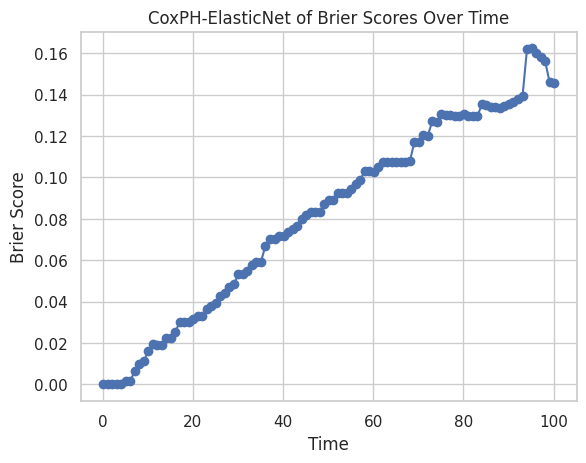

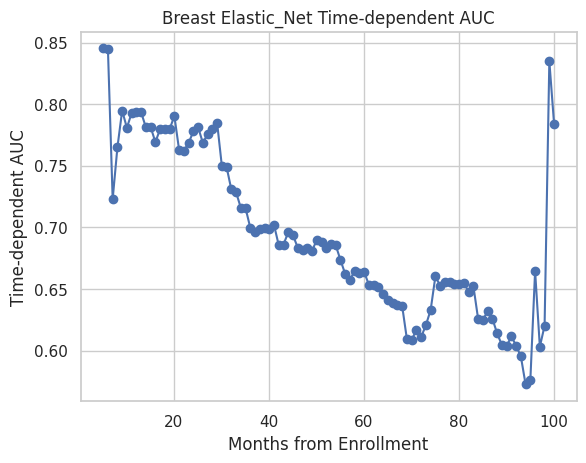

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import concordance_index_censored, integrated_brier_score, brier_score, cumulative_dynamic_auc

# Assuming you have already trained and obtained the Elastic Net model called 'estimator_best'
# and 'test_data_x', 'test_data_y_structured' are the test features and target in the structured format.

# Calculate risk scores from the Elastic Net model
elastic_net_risk_scores = estimator_best.predict(test_data_x)

# Define the evaluation times
eval_times = np.arange(test_data_y['disease_free_survival_months'].min(), test_data_y['disease_free_survival_months'].max())

# Compute the time-dependent AUC scores
elastic_net_auc, elastic_net_mean_auc = cumulative_dynamic_auc(train_data_y_structured, test_data_y_structured, elastic_net_risk_scores, eval_times)

# Convert the survival functions to the expected 2-D array-like format
survival_array = np.asarray([fn(eval_times).flatten() for fn in survival_functions])  # Make sure to define 'survival_functions' before this line

# Compute the Brier score at each time point
elastic_net_brier_score_times, elastic_net_brier_scores = brier_score(survival_train=train_data_y_structured, survival_test=test_data_y_structured, estimate=survival_array, times=eval_times)

# Plot the results for the Brier score
plt.figure()
plt.plot(elastic_net_brier_score_times, elastic_net_brier_scores, marker="o")
plt.title("CoxPH-ElasticNet of Brier Scores Over Time")
plt.xlabel("Time")
plt.ylabel("Brier Score")
plt.grid(True)
plt.show()

# Plot the results for the time-dependent AUC
plt.figure()
plt.plot(eval_times, elastic_net_auc, marker="o")
plt.axhline(elastic_net_mean_auc, linestyle="--")
plt.title("Breast Elastic_Net Time-dependent AUC")
plt.xlabel("Months from Enrollment")
plt.ylabel("Time-dependent AUC")
plt.grid(True)
plt.show()


In [ ]:
### SAVE Elastic net mean AUC

import numpy as np

# save the numpy arrays to the specified directory
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/elastic_net_mean_auc.npy', elastic_net_mean_auc)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/elastic_net_auc.npy', elastic_net_auc)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/elastic_net_brier_score_times.npy', elastic_net_brier_score_times)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Time_depedent_AUC_and_Brier_plots/elastic_net_brier_scores.npy', elastic_net_brier_scores)


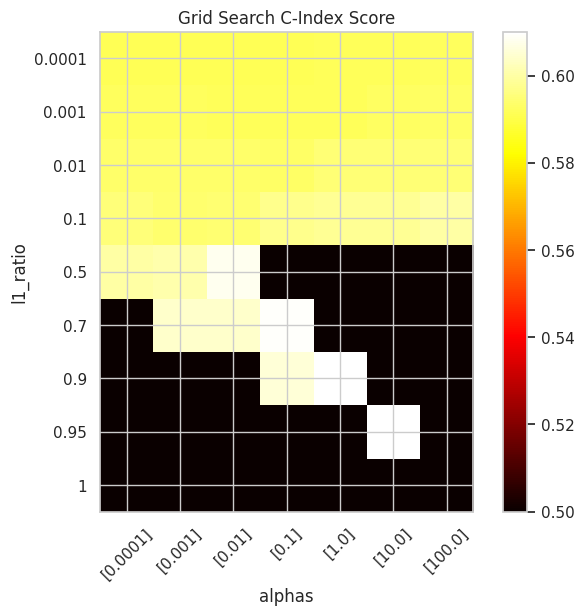

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract mean test scores and reshape to the form of the grid
scores = grid.cv_results_['mean_test_score']
scores = scores.reshape(len(param_grid['l1_ratio']), len(param_grid['alphas']))

# Make the plot
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('alphas')
plt.ylabel('l1_ratio')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['alphas'])), param_grid['alphas'], rotation=45)
plt.yticks(np.arange(len(param_grid['l1_ratio'])), param_grid['l1_ratio'])
plt.title('Grid Search C-Index Score')
plt.show()


In [ ]:
## This is the one we're going with, as of 5/8/23
# Cox Elastic Net with bootstrap resampling, no grid search inside the loop

from sklearn.utils import resample
from numpy import percentile
from sklearn.model_selection import GridSearchCV
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.metrics import concordance_index_censored, integrated_brier_score

n_bootstrap_iterations = 200
bootstrap_c_indices_elastic_net = np.zeros(n_bootstrap_iterations)
bootstrap_ibs_elastic_net = np.zeros(n_bootstrap_iterations)

# Use structured arrays for train and test data
train_data_y_structured = np.array(list(zip(train_data_y["disease_free_survival_status"], train_data_y["disease_free_survival_months"])), dtype=[('Status', '?'), ('Time', '<f8')])
test_data_y_structured = np.array(list(zip(test_data_y["disease_free_survival_status"], test_data_y["disease_free_survival_months"])), dtype=[('Status', '?'), ('Time', '<f8')])

times = np.linspace(test_data_y_structured["Time"].min(), test_data_y_structured["Time"].max(), 100, endpoint=False)

for i in range(n_bootstrap_iterations):
    bootstrap_indices = resample(np.arange(len(train_data_x)), replace=True)
    bootstrap_train_x = train_data_x.iloc[bootstrap_indices]
    bootstrap_train_y = train_data_y_structured[bootstrap_indices]

    estimator_best = CoxnetSurvivalAnalysisWithScore(l1_ratio=grid.best_params_['l1_ratio'], alphas=grid.best_params_['alphas'], fit_baseline_model=True)
    estimator_best.fit(bootstrap_train_x, bootstrap_train_y)
    prediction = estimator_best.predict(test_data_x)
    survival_functions = estimator_best.predict_survival_function(test_data_x)
    survival_array = np.asarray([fn(times).flatten() for fn in survival_functions])

    result = concordance_index_censored(test_data_y_structured["Status"], test_data_y_structured["Time"], prediction)
    bootstrap_c_indices_elastic_net[i] = result[0]
    ibs = integrated_brier_score(survival_train=bootstrap_train_y, survival_test=test_data_y_structured, estimate=survival_array, times=times)
    bootstrap_ibs_elastic_net[i] = ibs

lower_percentile_c_index = np.percentile(bootstrap_c_indices_elastic_net, 2.5)
upper_percentile_c_index = np.percentile(bootstrap_c_indices_elastic_net, 97.5)
lower_percentile_ibs = np.percentile(bootstrap_ibs_elastic_net, 2.5)
upper_percentile_ibs = np.percentile(bootstrap_ibs_elastic_net, 97.5)

print('Bootstrap 95% confidence interval for the C-index: ({:.2f}, {:.2f})'.format(lower_percentile_c_index, upper_percentile_c_index))
print('Bootstrap 95% confidence interval for the IBS: ({:.2f}, {:.2f})'.format(lower_percentile_ibs, upper_percentile_ibs))




Bootstrap 95% confidence interval for the C-index: (0.63, 0.68)
Bootstrap 95% confidence interval for the IBS: (0.08, 0.08)


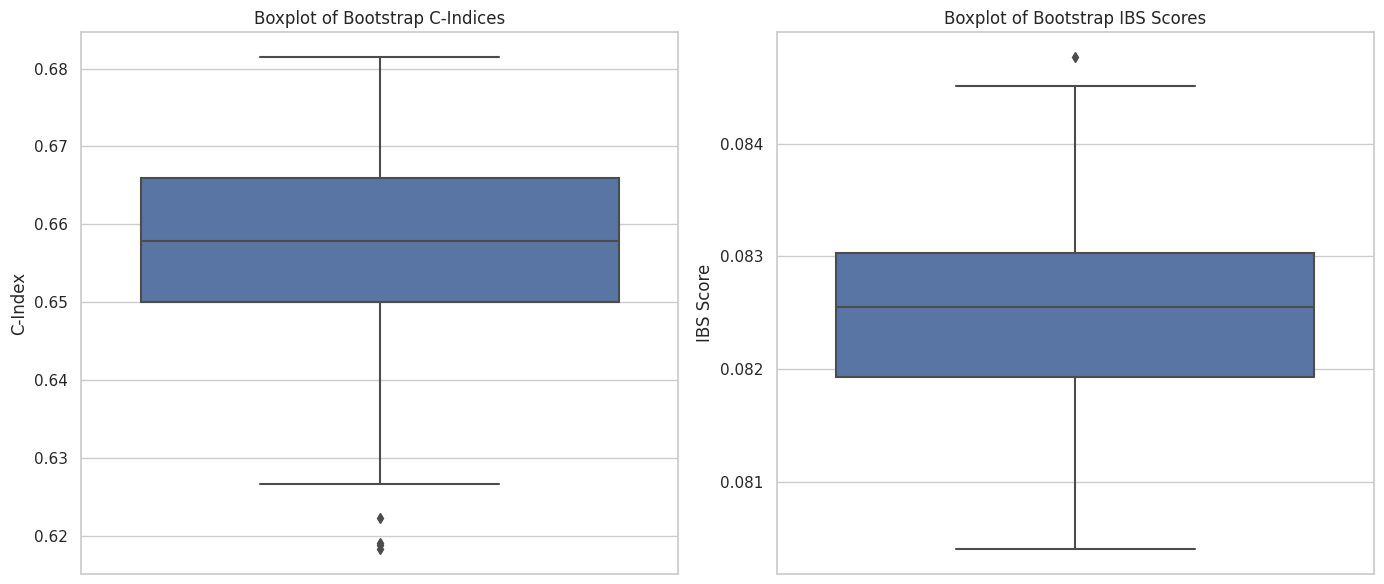

In [ ]:
# # this is without the grid search included in the resampling 5/8/23
# # Plotting Cox Elastic Net with bootstrap resampling
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=bootstrap_c_indices_elastic_net)
plt.title("Boxplot of Bootstrap C-Indices")
plt.ylabel("C-Index")

plt.subplot(1, 2, 2)
sns.boxplot(y=bootstrap_ibs_elastic_net)
plt.title("Boxplot of Bootstrap IBS Scores")
plt.ylabel("IBS Score")

plt.tight_layout()
plt.show()

In [ ]:
### Saving the confidence intervals for the c-indices and IBSs
import numpy as np

# save the numpy arrays to the specified directory

np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Confidence_intervals_breast_IBS_cindex/bootstrap_c_indices_elastic_net.npy', bootstrap_c_indices_elastic_net)
np.save('/content/drive/MyDrive/MSc_summer_project/Clinical_trial_data/Breast/Confidence_intervals_breast_IBS_cindex/bootstrap_ibs_elastic_net.npy', bootstrap_ibs_elastic_net)

